<a href="https://colab.research.google.com/github/Sisterno/ML_RedesNeuronales/blob/master/IT03/Modelo_entrenamiento__IT03_try02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from time import time
import pathlib

path_img_leucocitos = "/content/drive/MyDrive/ML/04-dataset-preprocesado-fusion";
pathlib_img_leucocitos=pathlib.Path(path_img_leucocitos)

from google.colab import drive
drive.mount('/content/drive')

# batch_size = 32
batch_size = 128
img_height = 180
img_width = 180

#-------------------------------------------------------------------------------
class TimingCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []
    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time()
    def on_epoch_end(self, batch, logs={}):
        self.times.append(time() - self.epoch_time_start)
#-------------------------------------------------------------------------------

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_img_leucocitos,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_img_leucocitos,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
# train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 59877 files belonging to 5 classes.
Using 47902 files for training.
Found 59877 files belonging to 5 classes.
Using 11975 files for validation.


## Modelo DS002-I03-D001

In [ ]:
#-------------------------------------------------------------------------------
from time import time
cb_I03_D001 = TimingCallback()
num_classes = 5
epochs=50

model_I03_D001 = Sequential([
  layers.Conv2D(4, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(16, activation='relu'),
  layers.Dense(num_classes)
])
model_I03_D001.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I03_D001.summary()


history_I03_D001 = model_I03_D001.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I03_D001]
)

#-------------------------------------------------------------------------------

Epoch 1/50
1497/1497 [==============================] - 8729s 6s/step - loss: 1.5352 - accuracy: 0.5384 - val_loss: 0.8298 - val_accuracy: 0.6565
Epoch 2/50
1497/1497 [==============================] - 119s 79ms/step - loss: 0.7692 - accuracy: 0.6799 - val_loss: 0.6990 - val_accuracy: 0.7155
Epoch 3/50
1497/1497 [==============================] - 118s 79ms/step - loss: 0.6331 - accuracy: 0.7405 - val_loss: 0.5989 - val_accuracy: 0.7614
Epoch 4/50
1497/1497 [==============================] - 118s 78ms/step - loss: 0.5362 - accuracy: 0.7792 - val_loss: 0.5409 - val_accuracy: 0.7789
Epoch 5/50
1497/1497 [==============================] - 117s 78ms/step - loss: 0.4944 - accuracy: 0.7994 - val_loss: 0.4530 - val_accuracy: 0.8169
Epoch 6/50
1497/1497 [==============================] - 117s 78ms/step - loss: 0.4404 - accuracy: 0.8261 - val_loss: 0.4581 - val_accuracy: 0.8198
Epoch 7/50
1497/1497 [==============================] - 117s 78ms/step - loss: 0.3913 - accuracy: 0.8446 - val_loss: 0.

[8729.048716783524, 118.75945401191711, 117.9949209690094, 117.84145331382751, 116.77816581726074, 116.6380934715271, 116.70074963569641, 116.48341584205627, 115.94351983070374, 116.63906121253967, 116.41391658782959, 115.62006139755249, 115.86471009254456, 115.56962084770203, 117.9055118560791, 120.42596340179443, 120.66181230545044, 122.235684633255, 123.51940178871155, 123.79861116409302, 123.97238683700562, 124.07474660873413, 125.35071468353271, 125.51616430282593, 124.68429136276245, 124.94870567321777, 125.02675938606262, 125.59479999542236, 125.91260194778442, 125.05155491828918, 126.68639302253723, 126.02585577964783, 125.38827133178711, 125.88958477973938, 125.54884219169617, 125.9728856086731, 124.96864604949951, 125.69265580177307, 124.51245045661926, 125.00888657569885, 124.55065655708313, 123.79565167427063, 124.4154646396637, 124.47564744949341, 121.51015639305115, 125.46927690505981, 126.27532076835632, 126.52548384666443, 127.16436839103699, 127.46621632575989]
El entr

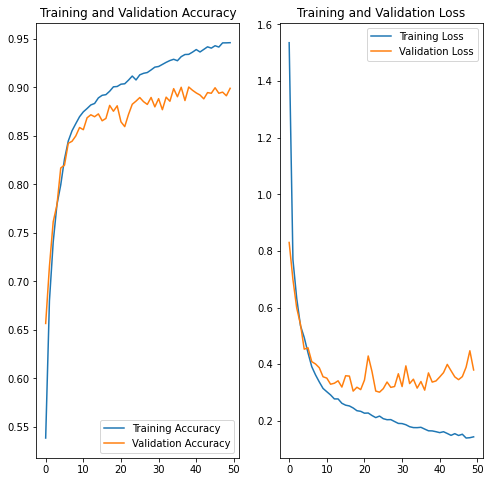

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I03_D001.times)
final_time = 0
for time in cb_I03_D001.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I03_D001.history['accuracy'])))
print('loss => '+ str(min(history_I03_D001.history['loss'])))
print('val_accuracy => '+ str(max(history_I03_D001.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I03_D001.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I03_D001.history['accuracy']
val_acc = history_I03_D001.history['val_accuracy']

loss=history_I03_D001.history['loss']
val_loss=history_I03_D001.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I03-D002

In [ ]:
#-------------------------------------------------------------------------------
from time import time
cb_I03_D002 = TimingCallback()
num_classes = 5
epochs=30

model_I03_D002 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='sigmoid'),
  layers.Dense(num_classes)
])
model_I03_D002.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I03_D002.summary()


history_I03_D002 = model_I03_D002.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I03_D002]
)

#-------------------------------------------------------------------------------

Epoch 1/30
749/749 [==============================] - 115s 151ms/step - loss: 1.3643 - accuracy: 0.4242 - val_loss: 0.9448 - val_accuracy: 0.6020
Epoch 2/30
749/749 [==============================] - 115s 152ms/step - loss: 0.8311 - accuracy: 0.6613 - val_loss: 0.7181 - val_accuracy: 0.7202
Epoch 3/30
749/749 [==============================] - 112s 149ms/step - loss: 0.6963 - accuracy: 0.7255 - val_loss: 0.6361 - val_accuracy: 0.7509
Epoch 4/30
749/749 [==============================] - 112s 149ms/step - loss: 0.6084 - accuracy: 0.7609 - val_loss: 0.5943 - val_accuracy: 0.7643
Epoch 5/30
749/749 [==============================] - 112s 149ms/step - loss: 0.5561 - accuracy: 0.7839 - val_loss: 0.5325 - val_accuracy: 0.7912
Epoch 6/30
749/749 [==============================] - 113s 150ms/step - loss: 0.5214 - accuracy: 0.8001 - val_loss: 0.5056 - val_accuracy: 0.8025
Epoch 7/30
749/749 [==============================] - 114s 151ms/step - loss: 0.4913 - accuracy: 0.8114 - val_loss: 0.4942 -

[114.55880331993103, 114.67337369918823, 112.14787435531616, 112.1949872970581, 112.22354483604431, 112.86325764656067, 113.68888330459595, 112.92829823493958, 113.31439423561096, 112.10187864303589, 112.59541654586792, 111.78328609466553, 112.17263889312744, 112.30340528488159, 111.55926704406738, 112.14627480506897, 111.8170280456543, 112.43877983093262, 111.7127628326416, 111.95240330696106, 112.55238032341003, 112.0083966255188, 112.26378631591797, 111.92605328559875, 112.50234818458557, 112.01725149154663, 111.83227443695068, 112.85787987709045, 112.73997092247009, 112.57948803901672]
El entrenamiento se demoro: 3374.456387758255 segundos
El entrenamiento se demoro: 56.24093979597092 minutos
accuracy => 0.9232391119003296
loss => 0.2198794037103653
val_accuracy => 0.8896868228912354
val_loss => 0.30349329113960266


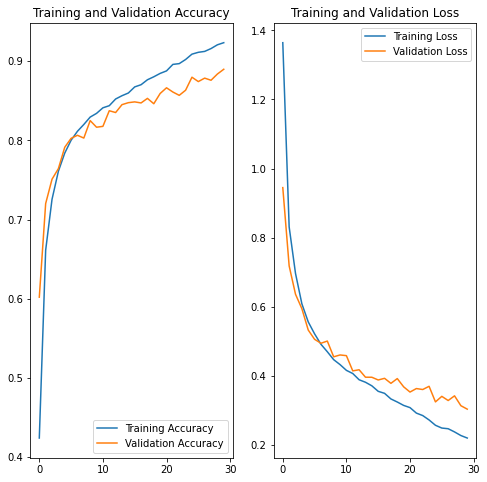

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I03_D002.times)
final_time = 0
for time in cb_I03_D002.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I03_D002.history['accuracy'])))
print('loss => '+ str(min(history_I03_D002.history['loss'])))
print('val_accuracy => '+ str(max(history_I03_D002.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I03_D002.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I03_D002.history['accuracy']
val_acc = history_I03_D002.history['val_accuracy']

loss=history_I03_D002.history['loss']
val_loss=history_I03_D002.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I03-D003

In [ ]:
#-------------------------------------------------------------------------------
from time import time
cb_I03_D003 = TimingCallback()
num_classes = 5
epochs=35

model_I03_D003 = Sequential([
  layers.Conv2D(4, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(16, activation='relu'),
  layers.Dense(num_classes)
])
model_I03_D003.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I03_D003.summary()


history_I03_D003 = model_I03_D003.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I03_D003]
)

#-------------------------------------------------------------------------------

Epoch 1/35
1497/1497 [==============================] - 141s 83ms/step - loss: 0.9653 - accuracy: 0.6217 - val_loss: 0.6533 - val_accuracy: 0.7435
Epoch 2/35
1497/1497 [==============================] - 120s 80ms/step - loss: 0.5733 - accuracy: 0.7768 - val_loss: 0.4628 - val_accuracy: 0.8215
Epoch 3/35
1497/1497 [==============================] - 122s 82ms/step - loss: 0.4396 - accuracy: 0.8287 - val_loss: 0.4062 - val_accuracy: 0.8397
Epoch 4/35
1497/1497 [==============================] - 123s 82ms/step - loss: 0.3881 - accuracy: 0.8481 - val_loss: 0.3636 - val_accuracy: 0.8600
Epoch 5/35
1497/1497 [==============================] - 121s 81ms/step - loss: 0.3529 - accuracy: 0.8615 - val_loss: 0.3288 - val_accuracy: 0.8717
Epoch 6/35
1497/1497 [==============================] - 122s 81ms/step - loss: 0.3266 - accuracy: 0.8704 - val_loss: 0.3081 - val_accuracy: 0.8787
Epoch 7/35
1497/1497 [==============================] - 121s 81ms/step - loss: 0.3068 - accuracy: 0.8769 - val_loss: 0

[140.61288690567017, 120.43704581260681, 122.3971095085144, 123.22010684013367, 121.35645747184753, 122.31632018089294, 121.34104013442993, 121.5194685459137, 121.52310991287231, 121.4620668888092, 121.20100951194763, 122.04409456253052, 123.08782386779785, 122.63059782981873, 122.0378303527832, 122.3461537361145, 123.5725257396698, 122.54287719726562, 122.84545397758484, 122.28331446647644, 122.85480165481567, 122.92342853546143, 123.01855945587158, 123.27248764038086, 123.84517884254456, 123.92823767662048, 124.23202180862427, 124.73180150985718, 124.12661576271057, 124.40030264854431, 125.23751378059387, 125.181795835495, 124.36604142189026, 125.87893795967102, 125.57481479644775]
El entrenamiento se demoro: 4324.349832773209 segundos
El entrenamiento se demoro: 72.07249721288682 minutos
accuracy => 0.9270802736282349
loss => 0.18974041938781738
val_accuracy => 0.9179123044013977
val_loss => 0.23798079788684845


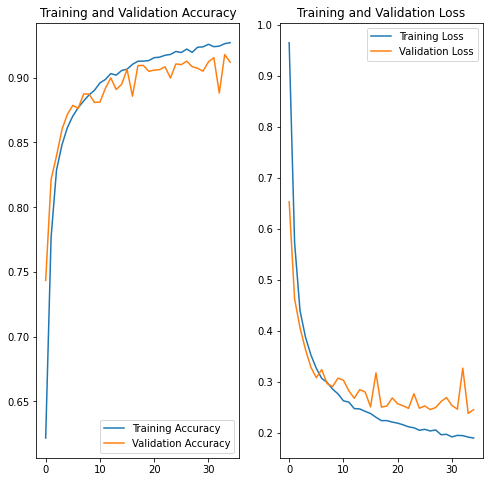

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I03_D003.times)
final_time = 0
for time in cb_I03_D003.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I03_D003.history['accuracy'])))
print('loss => '+ str(min(history_I03_D003.history['loss'])))
print('val_accuracy => '+ str(max(history_I03_D003.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I03_D003.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I03_D003.history['accuracy']
val_acc = history_I03_D003.history['val_accuracy']

loss=history_I03_D003.history['loss']
val_loss=history_I03_D003.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I03-D004

In [ ]:
#-------------------------------------------------------------------------------
from time import time
cb_I03_D004 = TimingCallback()
num_classes = 5
epochs=30

model_I03_D004 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='sigmoid'),
  layers.Dense(num_classes)
])
model_I03_D004.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I03_D004.summary()


history_I03_D004 = model_I03_D004.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I03_D004]
)

#-------------------------------------------------------------------------------

Epoch 1/30
1497/1497 [==============================] - 141s 83ms/step - loss: 1.3436 - accuracy: 0.4440 - val_loss: 1.2611 - val_accuracy: 0.4957
Epoch 2/30
1497/1497 [==============================] - 123s 82ms/step - loss: 1.0937 - accuracy: 0.5640 - val_loss: 0.9692 - val_accuracy: 0.5979
Epoch 3/30
1497/1497 [==============================] - 123s 82ms/step - loss: 0.9098 - accuracy: 0.6148 - val_loss: 0.8363 - val_accuracy: 0.6330
Epoch 4/30
1497/1497 [==============================] - 125s 83ms/step - loss: 0.8150 - accuracy: 0.6445 - val_loss: 0.7955 - val_accuracy: 0.6595
Epoch 5/30
1497/1497 [==============================] - 123s 82ms/step - loss: 0.7734 - accuracy: 0.6761 - val_loss: 0.7296 - val_accuracy: 0.7091
Epoch 6/30
1497/1497 [==============================] - 123s 82ms/step - loss: 0.7319 - accuracy: 0.7025 - val_loss: 0.6927 - val_accuracy: 0.7262
Epoch 7/30
1497/1497 [==============================] - 122s 81ms/step - loss: 0.6982 - accuracy: 0.7197 - val_loss: 0

[141.20116424560547, 123.12764644622803, 122.65060186386108, 124.69945812225342, 123.21423816680908, 123.30779600143433, 122.36584115028381, 121.58658957481384, 125.38966846466064, 126.44094133377075, 127.99348878860474, 128.02192544937134, 128.14940667152405, 122.8721854686737, 123.87803983688354, 124.80114412307739, 125.91478300094604, 126.25413465499878, 128.69677662849426, 129.44077587127686, 128.75530886650085, 127.58511877059937, 129.45748901367188, 128.33702540397644, 127.03205442428589, 124.9958803653717, 121.10575938224792, 121.8592574596405, 122.72194647789001, 125.9239399433136]
El entrenamiento se demoro: 3777.7803859710693 segundos
El entrenamiento se demoro: 62.96300643285115 minutos
accuracy => 0.8910066485404968
loss => 0.29203471541404724
val_accuracy => 0.8950313329696655
val_loss => 0.2904820740222931


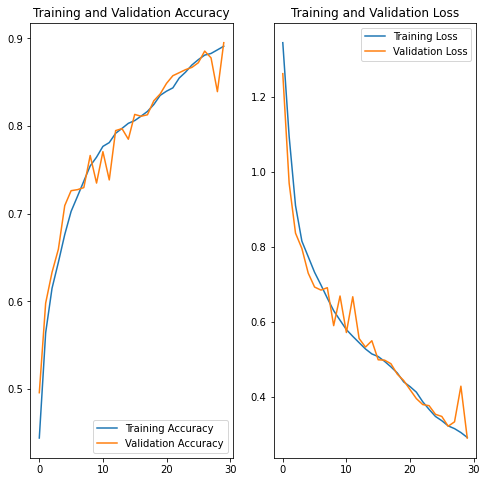

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I03_D004.times)
final_time = 0
for time in cb_I03_D004.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I03_D004.history['accuracy'])))
print('loss => '+ str(min(history_I03_D004.history['loss'])))
print('val_accuracy => '+ str(max(history_I03_D004.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I03_D004.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I03_D004.history['accuracy']
val_acc = history_I03_D004.history['val_accuracy']

loss=history_I03_D004.history['loss']
val_loss=history_I03_D004.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I03-D005

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cbI03_D005 = TimingCallback()
num_classes = 5

modelI03_D005 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(8, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.Dense(num_classes)
])
modelI03_D005.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# modelI03_D005.summary()

epochs=20
historyI03_D005 = modelI03_D005.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cbI03_D005]
)

#-------------------------------------------------------------------------------

Epoch 1/20
1497/1497 [==============================] - 8381s 6s/step - loss: 0.8944 - accuracy: 0.6920 - val_loss: 0.6110 - val_accuracy: 0.7844
Epoch 2/20
1497/1497 [==============================] - 114s 76ms/step - loss: 0.5070 - accuracy: 0.8409 - val_loss: 0.5044 - val_accuracy: 0.8545
Epoch 3/20
1497/1497 [==============================] - 113s 75ms/step - loss: 0.3970 - accuracy: 0.8888 - val_loss: 0.4409 - val_accuracy: 0.8716
Epoch 4/20
1497/1497 [==============================] - 114s 76ms/step - loss: 0.3460 - accuracy: 0.9116 - val_loss: 0.4060 - val_accuracy: 0.8969
Epoch 5/20
1497/1497 [==============================] - 113s 76ms/step - loss: 0.3293 - accuracy: 0.9235 - val_loss: 0.3999 - val_accuracy: 0.9071
Epoch 6/20
1497/1497 [==============================] - 115s 77ms/step - loss: 0.3150 - accuracy: 0.9319 - val_loss: 0.4260 - val_accuracy: 0.8962
Epoch 7/20
1497/1497 [==============================] - 116s 78ms/step - loss: 0.3014 - accuracy: 0.9378 - val_loss: 0.

[8380.733489990234, 113.55851316452026, 113.31317853927612, 113.82801461219788, 113.46258568763733, 115.07542443275452, 116.44064140319824, 117.2084469795227, 116.9012942314148, 117.3010995388031, 116.65178990364075, 116.67941117286682, 116.69714689254761, 115.08451247215271, 117.04080414772034, 115.96684265136719, 117.22557497024536, 116.96814441680908, 116.5432813167572, 117.1509997844696]
El entrenamiento se demoro: 10583.831196308136 segundos
El entrenamiento se demoro: 176.3971866051356 minutos
accuracy => 0.9603356719017029
loss => 0.2578442096710205
val_accuracy => 0.9291858077049255
val_loss => 0.3715253472328186


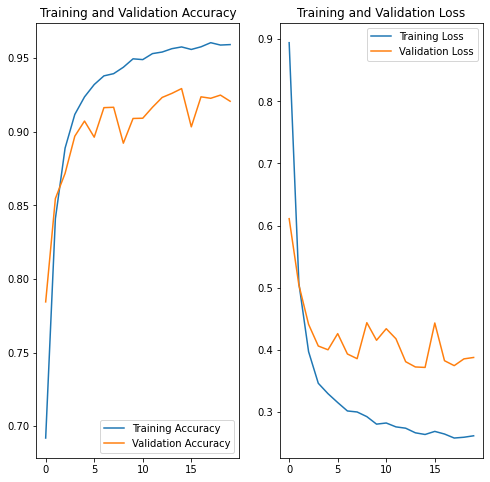

In [ ]:
#-------------------------------------------------------------------------------
print(cbI03_D005.times)
final_time = 0
for time in cbI03_D005.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(historyI03_D005.history['accuracy'])))
print('loss => '+ str(min(historyI03_D005.history['loss'])))
print('val_accuracy => '+ str(max(historyI03_D005.history['val_accuracy'])))
print('val_loss => '+ str(min(historyI03_D005.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = historyI03_D005.history['accuracy']
val_acc = historyI03_D005.history['val_accuracy']

loss=historyI03_D005.history['loss']
val_loss=historyI03_D005.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I03-D006

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I03_D006 = TimingCallback()
num_classes = 10

model_I03_D006 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.Dense(num_classes)
])
model_I03_D006.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I03_D006.summary()

epochs=20
history_I03_D006 = model_I03_D006.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I03_D006]
)

#-------------------------------------------------------------------------------

Epoch 1/20
749/749 [==============================] - 114s 151ms/step - loss: 3.2551 - accuracy: 0.6680 - val_loss: 0.8597 - val_accuracy: 0.7262
Epoch 2/20
749/749 [==============================] - 113s 150ms/step - loss: 0.7519 - accuracy: 0.7756 - val_loss: 0.7721 - val_accuracy: 0.7702
Epoch 3/20
749/749 [==============================] - 114s 151ms/step - loss: 0.6623 - accuracy: 0.8145 - val_loss: 0.6857 - val_accuracy: 0.8110
Epoch 4/20
749/749 [==============================] - 113s 150ms/step - loss: 0.9201 - accuracy: 0.7322 - val_loss: 0.8192 - val_accuracy: 0.7609
Epoch 5/20
749/749 [==============================] - 113s 150ms/step - loss: 0.7144 - accuracy: 0.7966 - val_loss: 0.7072 - val_accuracy: 0.7958
Epoch 6/20
749/749 [==============================] - 114s 151ms/step - loss: 0.6258 - accuracy: 0.8276 - val_loss: 0.6448 - val_accuracy: 0.8175
Epoch 7/20
749/749 [==============================] - 113s 150ms/step - loss: 0.5661 - accuracy: 0.8535 - val_loss: 0.6528 -

[114.26936650276184, 113.32579731941223, 113.85824060440063, 113.12198424339294, 112.96435451507568, 113.64170289039612, 113.15320587158203, 114.01567387580872, 113.99199390411377, 113.74753260612488, 113.56993055343628, 114.95851063728333, 113.87241649627686, 113.44769191741943, 113.8695182800293, 115.61616110801697, 114.0379638671875, 116.05242991447449, 114.27857184410095, 115.1219801902771]
El entrenamiento se demoro: 2280.915027141571 segundos
El entrenamiento se demoro: 38.01525045235952 minutos
accuracy => 0.952757716178894
loss => 0.31438109278678894
val_accuracy => 0.9003757834434509
val_loss => 0.5191941857337952


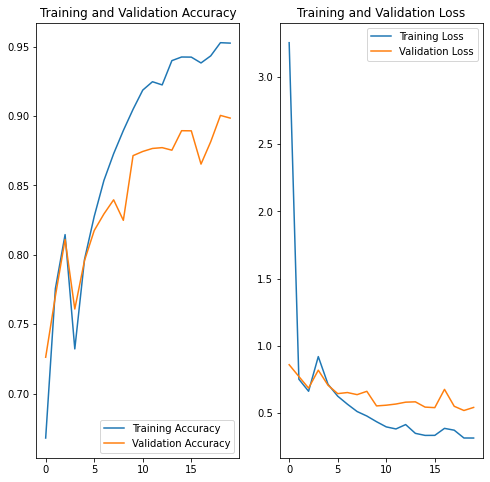

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I03_D006.times)
final_time = 0
for time in cb_I03_D006.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I03_D006.history['accuracy'])))
print('loss => '+ str(min(history_I03_D006.history['loss'])))
print('val_accuracy => '+ str(max(history_I03_D006.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I03_D006.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I03_D006.history['accuracy']
val_acc = history_I03_D006.history['val_accuracy']

loss=history_I03_D006.history['loss']
val_loss=history_I03_D006.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I03-D007

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I03_D007 = TimingCallback()
num_classes = 5
epochs=20

model_I03_D007 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.Dense(num_classes)
])
model_I03_D007.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I03_D007.summary()


history_I03_D007 = model_I03_D007.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I03_D007]
)

#-------------------------------------------------------------------------------

Epoch 1/20
749/749 [==============================] - 112s 148ms/step - loss: 5.9403 - accuracy: 0.5590 - val_loss: 0.9222 - val_accuracy: 0.6393
Epoch 2/20
749/749 [==============================] - 111s 147ms/step - loss: 0.8745 - accuracy: 0.6675 - val_loss: 0.8444 - val_accuracy: 0.6764
Epoch 3/20
749/749 [==============================] - 111s 147ms/step - loss: 0.7341 - accuracy: 0.7220 - val_loss: 0.7651 - val_accuracy: 0.7146
Epoch 4/20
749/749 [==============================] - 111s 147ms/step - loss: 0.6485 - accuracy: 0.7558 - val_loss: 0.7752 - val_accuracy: 0.7235
Epoch 5/20
749/749 [==============================] - 111s 148ms/step - loss: 0.6105 - accuracy: 0.7705 - val_loss: 0.7642 - val_accuracy: 0.7214
Epoch 6/20
749/749 [==============================] - 111s 147ms/step - loss: 0.5913 - accuracy: 0.7811 - val_loss: 0.7123 - val_accuracy: 0.7451
Epoch 7/20
749/749 [==============================] - 111s 147ms/step - loss: 0.5643 - accuracy: 0.7933 - val_loss: 0.7082 -

[112.35335111618042, 111.26008081436157, 111.2876079082489, 110.78749227523804, 111.36792993545532, 110.76215291023254, 110.9896445274353, 110.81444764137268, 110.84769630432129, 111.6601231098175, 111.02625775337219, 111.21522808074951, 111.3414568901062, 111.45664405822754, 111.13966608047485, 111.3648898601532, 111.58373498916626, 111.1319227218628, 111.77062487602234, 110.90761375427246]
El entrenamiento se demoro: 2225.068565607071 segundos
El entrenamiento se demoro: 37.08447609345118 minutos
accuracy => 0.9337605834007263
loss => 0.3399716019630432
val_accuracy => 0.8644676208496094
val_loss => 0.5849406123161316


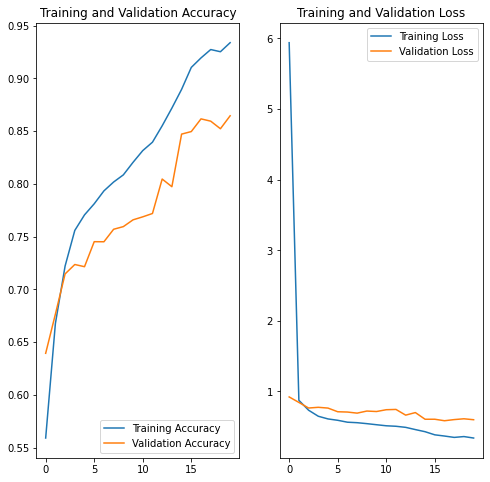

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I03_D007.times)
final_time = 0
for time in cb_I03_D007.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I03_D007.history['accuracy'])))
print('loss => '+ str(min(history_I03_D007.history['loss'])))
print('val_accuracy => '+ str(max(history_I03_D007.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I03_D007.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I03_D007.history['accuracy']
val_acc = history_I03_D007.history['val_accuracy']

loss=history_I03_D007.history['loss']
val_loss=history_I03_D007.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I03-D008



In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I03_D008 = TimingCallback()
num_classes = 5

model_I03_D008 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(8, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
  layers.Dense(num_classes)
])
model_I03_D008.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I03_D008.summary()

epochs=20
history_I03_D008 = model_I03_D008.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I03_D008]
)

#-------------------------------------------------------------------------------

Epoch 1/20
749/749 [==============================] - 114s 150ms/step - loss: 2.1832 - accuracy: 0.6930 - val_loss: 0.5549 - val_accuracy: 0.7687
Epoch 2/20
749/749 [==============================] - 114s 151ms/step - loss: 0.4793 - accuracy: 0.8063 - val_loss: 0.4705 - val_accuracy: 0.8140
Epoch 3/20
749/749 [==============================] - 113s 150ms/step - loss: 0.3853 - accuracy: 0.8487 - val_loss: 0.4473 - val_accuracy: 0.8359
Epoch 4/20
749/749 [==============================] - 114s 151ms/step - loss: 0.3305 - accuracy: 0.8788 - val_loss: 0.3948 - val_accuracy: 0.8668
Epoch 5/20
749/749 [==============================] - 114s 151ms/step - loss: 0.2766 - accuracy: 0.9046 - val_loss: 0.4232 - val_accuracy: 0.8688
Epoch 6/20
749/749 [==============================] - 113s 150ms/step - loss: 0.2281 - accuracy: 0.9261 - val_loss: 0.3590 - val_accuracy: 0.8965
Epoch 7/20
749/749 [==============================] - 114s 151ms/step - loss: 0.2159 - accuracy: 0.9339 - val_loss: 0.4262 -

[113.81656908988953, 114.2742805480957, 113.43481040000916, 114.1779670715332, 113.72886490821838, 113.1715795993805, 113.6744339466095, 113.2036645412445, 113.62428283691406, 113.51068592071533, 113.21020293235779, 113.89488458633423, 113.38997030258179, 113.07827568054199, 113.20237755775452, 113.37986898422241, 113.59625744819641, 113.13308453559875, 114.07154631614685, 113.35551381111145]
El entrenamiento se demoro: 2270.929121017456 segundos
El entrenamiento se demoro: 37.848818683624266 minutos
accuracy => 0.9805227518081665
loss => 0.11660191416740417
val_accuracy => 0.9227557182312012
val_loss => 0.35899096727371216


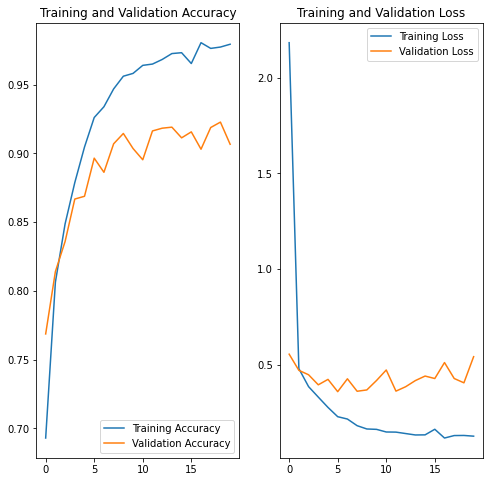

In [ ]:
#-------------------------------------------------------------------------------
print(cb_I03_D008.times)
final_time = 0
for time in cb_I03_D008.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I03_D008.history['accuracy'])))
print('loss => '+ str(min(history_I03_D008.history['loss'])))
print('val_accuracy => '+ str(max(history_I03_D008.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I03_D008.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I03_D008.history['accuracy']
val_acc = history_I03_D008.history['val_accuracy']

loss=history_I03_D008.history['loss']
val_loss=history_I03_D008.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I03-D009

In [8]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I03_D009 = TimingCallback()
num_classes = 10

model_I03_D009 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
  layers.Dense(num_classes)
])
model_I03_D009.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I03_D009.summary()

epochs=20
history_I03_D009 = model_I03_D009.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I03_D009]
)

#-------------------------------------------------------------------------------

Epoch 1/20
375/375 [==============================] - 114s 296ms/step - loss: 7.2009 - accuracy: 0.6718 - val_loss: 0.6057 - val_accuracy: 0.7654
Epoch 2/20
375/375 [==============================] - 111s 291ms/step - loss: 0.4820 - accuracy: 0.8223 - val_loss: 0.4206 - val_accuracy: 0.8572
Epoch 3/20
375/375 [==============================] - 111s 291ms/step - loss: 0.3579 - accuracy: 0.8751 - val_loss: 0.3465 - val_accuracy: 0.8833
Epoch 4/20
375/375 [==============================] - 109s 288ms/step - loss: 0.2701 - accuracy: 0.9117 - val_loss: 0.3352 - val_accuracy: 0.8923
Epoch 5/20
375/375 [==============================] - 110s 288ms/step - loss: 0.2443 - accuracy: 0.9235 - val_loss: 0.3157 - val_accuracy: 0.9069
Epoch 6/20
375/375 [==============================] - 113s 298ms/step - loss: 0.2015 - accuracy: 0.9430 - val_loss: 0.3228 - val_accuracy: 0.9101
Epoch 7/20
375/375 [==============================] - 111s 292ms/step - loss: 0.1770 - accuracy: 0.9533 - val_loss: 0.3281 -

[114.15950393676758, 110.77766060829163, 110.83696436882019, 109.46857714653015, 109.7658007144928, 113.31194543838501, 111.16254496574402, 111.68512797355652, 111.29276823997498, 112.20216512680054, 111.09759783744812, 110.61121320724487, 111.07532525062561, 113.22451663017273, 110.69864439964294, 111.73866152763367, 111.78105878829956, 114.6636290550232, 112.10133719444275, 110.83378601074219]
El entrenamiento se demoro: 2232.488828420639 segundos
El entrenamiento se demoro: 37.20814714034398 minutos
accuracy => 0.9859713315963745
loss => 0.11613233387470245
val_accuracy => 0.9401252865791321
val_loss => 0.3074694275856018


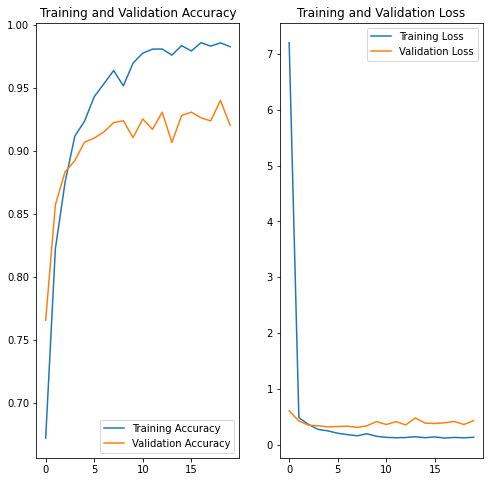

In [10]:
#-------------------------------------------------------------------------------

print(cb_I03_D009.times)
final_time = 0
for time in cb_I03_D009.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I03_D009.history['accuracy'])))
print('loss => '+ str(min(history_I03_D009.history['loss'])))
print('val_accuracy => '+ str(max(history_I03_D009.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I03_D009.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I03_D009.history['accuracy']
val_acc = history_I03_D009.history['val_accuracy']

loss=history_I03_D009.history['loss']
val_loss=history_I03_D009.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I03-D010

In [6]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I03_D010 = TimingCallback()
num_classes = 5
epochs=20

model_I03_D010 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
  layers.Dense(num_classes)
])
model_I03_D010.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I03_D010.summary()


history_I03_D010 = model_I03_D010.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I03_D010]
)

#-------------------------------------------------------------------------------

Epoch 1/20
375/375 [==============================] - 107s 278ms/step - loss: 14.6266 - accuracy: 0.4492 - val_loss: 1.0956 - val_accuracy: 0.5568
Epoch 2/20
375/375 [==============================] - 105s 276ms/step - loss: 1.0257 - accuracy: 0.5733 - val_loss: 0.9964 - val_accuracy: 0.5870
Epoch 3/20
375/375 [==============================] - 105s 276ms/step - loss: 0.9601 - accuracy: 0.5873 - val_loss: 0.9659 - val_accuracy: 0.5922
Epoch 4/20
375/375 [==============================] - 104s 274ms/step - loss: 0.9242 - accuracy: 0.5948 - val_loss: 0.9408 - val_accuracy: 0.5890
Epoch 5/20
375/375 [==============================] - 105s 275ms/step - loss: 0.9206 - accuracy: 0.5951 - val_loss: 1.0039 - val_accuracy: 0.5513
Epoch 6/20
375/375 [==============================] - 105s 275ms/step - loss: 0.9113 - accuracy: 0.6015 - val_loss: 0.9749 - val_accuracy: 0.6074
Epoch 7/20
375/375 [==============================] - 105s 275ms/step - loss: 0.8808 - accuracy: 0.6185 - val_loss: 0.9341 

[106.73277974128723, 105.26027417182922, 104.90738701820374, 104.42051959037781, 104.82092118263245, 104.53570675849915, 104.57500195503235, 103.61392331123352, 103.78654718399048, 104.55635452270508, 103.75348806381226, 103.80232214927673, 104.07502436637878, 103.44267177581787, 103.80335426330566, 103.68724536895752, 103.53765511512756, 103.87168955802917, 103.67197895050049, 103.74235391616821]
El entrenamiento se demoro: 2084.5971989631653 segundos
El entrenamiento se demoro: 34.743286649386086 minutos
accuracy => 0.7987557649612427
loss => 0.5024938583374023
val_accuracy => 0.7674321532249451
val_loss => 0.687534511089325


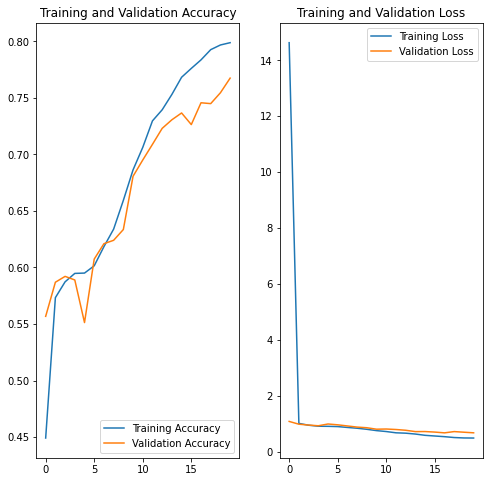

In [7]:
#-------------------------------------------------------------------------------

print(cb_I03_D010.times)
final_time = 0
for time in cb_I03_D010.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I03_D010.history['accuracy'])))
print('loss => '+ str(min(history_I03_D010.history['loss'])))
print('val_accuracy => '+ str(max(history_I03_D010.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I03_D010.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I03_D010.history['accuracy']
val_acc = history_I03_D010.history['val_accuracy']

loss=history_I03_D010.history['loss']
val_loss=history_I03_D010.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I03-D011



In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I03_D011 = TimingCallback()
num_classes = 5

model_I03_D011 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(8, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.Dense(num_classes)
])
model_I03_D011.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I03_D011.summary()

epochs=20
history_I03_D011 = model_I03_D011.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I03_D011]
)

#-------------------------------------------------------------------------------

Epoch 1/20
1497/1497 [==============================] - 115s 76ms/step - loss: 2.1760 - accuracy: 0.3249 - val_loss: 1.8291 - val_accuracy: 0.3240
Epoch 2/20
1497/1497 [==============================] - 114s 76ms/step - loss: 1.7708 - accuracy: 0.3269 - val_loss: 1.7194 - val_accuracy: 0.3240
Epoch 3/20
1497/1497 [==============================] - 114s 76ms/step - loss: 1.6772 - accuracy: 0.3270 - val_loss: 1.6444 - val_accuracy: 0.3240
Epoch 4/20
1497/1497 [==============================] - 113s 75ms/step - loss: 1.6196 - accuracy: 0.3270 - val_loss: 1.6142 - val_accuracy: 0.3240
Epoch 5/20
1497/1497 [==============================] - 114s 76ms/step - loss: 0.9547 - accuracy: 0.6417 - val_loss: 0.7273 - val_accuracy: 0.7609
Epoch 6/20
1497/1497 [==============================] - 114s 76ms/step - loss: 0.7198 - accuracy: 0.7596 - val_loss: 0.6462 - val_accuracy: 0.8001
Epoch 7/20
1497/1497 [==============================] - 114s 76ms/step - loss: 0.6413 - accuracy: 0.8007 - val_loss: 0

[115.18802833557129, 113.56847596168518, 113.78258800506592, 113.01938509941101, 113.97923016548157, 114.03068566322327, 113.77874207496643, 113.85197710990906, 113.59505558013916, 113.59986066818237, 113.958913564682, 114.24659419059753, 113.7178087234497, 113.44923973083496, 113.7864260673523, 113.39340877532959, 113.9644227027893, 113.88732528686523, 114.21925187110901, 115.07665419578552]
El entrenamiento se demoro: 2278.0940737724304 segundos
El entrenamiento se demoro: 37.96823456287384 minutos
accuracy => 0.9004843235015869
loss => 0.4371940791606903
val_accuracy => 0.9083924889564514
val_loss => 0.42689865827560425


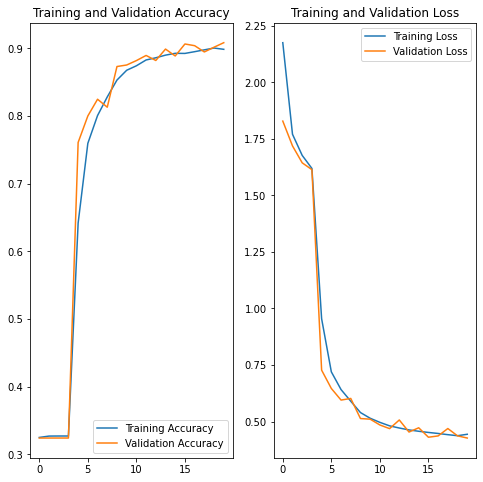

In [ ]:
#-------------------------------------------------------------------------------
print(cb_I03_D011.times)
final_time = 0
for time in cb_I03_D011.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I03_D011.history['accuracy'])))
print('loss => '+ str(min(history_I03_D011.history['loss'])))
print('val_accuracy => '+ str(max(history_I03_D011.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I03_D011.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I03_D011.history['accuracy']
val_acc = history_I03_D011.history['val_accuracy']

loss=history_I03_D011.history['loss']
val_loss=history_I03_D011.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I03-D012

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I03_D012 = TimingCallback()
num_classes = 10

model_I03_D012 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.Dense(num_classes)
])
model_I03_D012.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I03_D012.summary()

epochs=20
history_I03_D012 = model_I03_D012.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I03_D012]
)

#-------------------------------------------------------------------------------

Epoch 1/20
1497/1497 [==============================] - 118s 79ms/step - loss: 3.3817 - accuracy: 0.6453 - val_loss: 1.4367 - val_accuracy: 0.7408
Epoch 2/20
1497/1497 [==============================] - 118s 78ms/step - loss: 1.1747 - accuracy: 0.7706 - val_loss: 0.9801 - val_accuracy: 0.7991
Epoch 3/20
1497/1497 [==============================] - 117s 78ms/step - loss: 0.8685 - accuracy: 0.8243 - val_loss: 0.7572 - val_accuracy: 0.8575
Epoch 4/20
1497/1497 [==============================] - 118s 78ms/step - loss: 0.7179 - accuracy: 0.8621 - val_loss: 0.6538 - val_accuracy: 0.8831
Epoch 5/20
1497/1497 [==============================] - 117s 78ms/step - loss: 0.6612 - accuracy: 0.8749 - val_loss: 0.5953 - val_accuracy: 0.8995
Epoch 6/20
1497/1497 [==============================] - 118s 78ms/step - loss: 0.6218 - accuracy: 0.8852 - val_loss: 0.5823 - val_accuracy: 0.8935
Epoch 7/20
1497/1497 [==============================] - 118s 78ms/step - loss: 0.6102 - accuracy: 0.8889 - val_loss: 0

[118.50062108039856, 117.77634811401367, 117.4094705581665, 117.73434710502625, 117.17045283317566, 117.75653958320618, 117.56359601020813, 117.60669374465942, 117.74313831329346, 116.85963726043701, 117.14225697517395, 117.64965558052063, 117.83661961555481, 117.56096196174622, 117.48377275466919, 117.94138026237488, 117.95228123664856, 118.15084218978882, 117.70271587371826, 117.47943663597107]
El entrenamiento se demoro: 2353.020767688751 segundos
El entrenamiento se demoro: 39.21701279481252 minutos
accuracy => 0.9196901917457581
loss => 0.4440779685974121
val_accuracy => 0.93035489320755
val_loss => 0.429379940032959


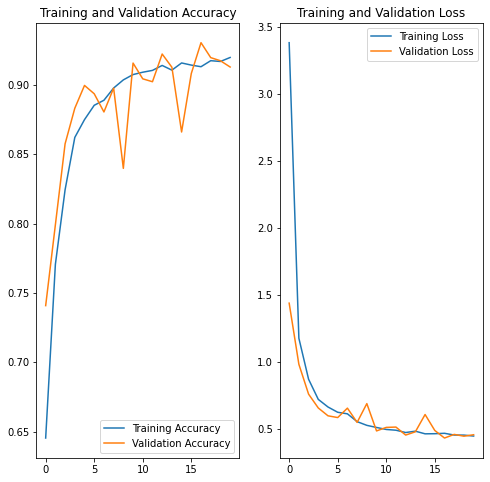

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I03_D012.times)
final_time = 0
for time in cb_I03_D012.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I03_D012.history['accuracy'])))
print('loss => '+ str(min(history_I03_D012.history['loss'])))
print('val_accuracy => '+ str(max(history_I03_D012.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I03_D012.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I03_D012.history['accuracy']
val_acc = history_I03_D012.history['val_accuracy']

loss=history_I03_D012.history['loss']
val_loss=history_I03_D012.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I03-D013

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I03_D013 = TimingCallback()
num_classes = 5
epochs=20

model_I03_D013 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.Dense(num_classes)
])
model_I03_D013.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I03_D013.summary()


history_I03_D013 = model_I03_D013.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I03_D013]
)

#-------------------------------------------------------------------------------

Epoch 1/20
1497/1497 [==============================] - 118s 78ms/step - loss: 8.8922 - accuracy: 0.5259 - val_loss: 1.2936 - val_accuracy: 0.6268
Epoch 2/20
1497/1497 [==============================] - 118s 78ms/step - loss: 1.1335 - accuracy: 0.6760 - val_loss: 0.9952 - val_accuracy: 0.7113
Epoch 3/20
1497/1497 [==============================] - 119s 79ms/step - loss: 0.9461 - accuracy: 0.7127 - val_loss: 0.8893 - val_accuracy: 0.7233
Epoch 4/20
1497/1497 [==============================] - 118s 79ms/step - loss: 0.8435 - accuracy: 0.7393 - val_loss: 0.7780 - val_accuracy: 0.7630
Epoch 5/20
1497/1497 [==============================] - 118s 79ms/step - loss: 0.7506 - accuracy: 0.7790 - val_loss: 0.7421 - val_accuracy: 0.7973
Epoch 6/20
1497/1497 [==============================] - 118s 79ms/step - loss: 0.7047 - accuracy: 0.8116 - val_loss: 0.7115 - val_accuracy: 0.8246
Epoch 7/20
1497/1497 [==============================] - 118s 79ms/step - loss: 0.7022 - accuracy: 0.8297 - val_loss: 0

[117.85875105857849, 117.83478784561157, 118.74676537513733, 118.29694676399231, 118.46892023086548, 117.96568298339844, 118.27966856956482, 117.77319645881653, 117.86178684234619, 117.18245005607605, 116.83973836898804, 118.05612063407898, 118.21994972229004, 118.32097268104553, 118.02237606048584, 118.65963006019592, 118.938157081604, 118.2849531173706, 118.33636355400085, 118.92708563804626]
El entrenamiento se demoro: 2362.8743031024933 segundos
El entrenamiento se demoro: 39.381238385041556 minutos
accuracy => 0.8792325854301453
loss => 0.5936858057975769
val_accuracy => 0.8755741119384766
val_loss => 0.6028614640235901


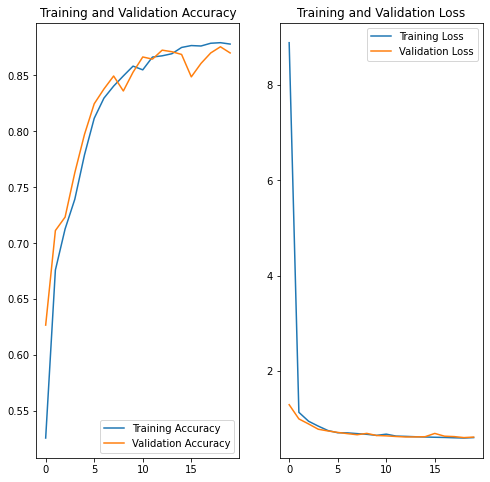

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I03_D013.times)
final_time = 0
for time in cb_I03_D013.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I03_D013.history['accuracy'])))
print('loss => '+ str(min(history_I03_D013.history['loss'])))
print('val_accuracy => '+ str(max(history_I03_D013.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I03_D013.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I03_D013.history['accuracy']
val_acc = history_I03_D013.history['val_accuracy']

loss=history_I03_D013.history['loss']
val_loss=history_I03_D013.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()